# What is TensorFlow

## Goal

- Introduce Tensorflow through this small project.
- Single input - Single output - Single neuron - Single layer Neural Network.

## Details

We need to create single-neuron Neural Network to convert Celsuis to Fahrenheit.

In [1]:
import tensorflow as tf
import numpy as np
import time

In [2]:
# Tensorflow version
print (tf.version.VERSION)
print (tf.__version__)

2.5.0
2.5.0


In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
c = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
f = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

- Feature: Model Input.
- Label: Desired Output.

Training is done using pair of feature/label (intput/output)

# Create Model

- units: number of neurons.
- inuput_shape: shape of input/features instance.
- Sequential: Model that containd sequance of layers.

In [5]:
model = tf.keras.Sequential(
    tf.keras.layers.Dense(units=1, input_shape=[1])
)

## Compile the model

This is a step must be done before training.

### Params

- Loss Function: Way to measure how far the prediction is from the label.
- Optimizer: Way to adjust internal values to reduce loss.

In [6]:
model.compile(
        loss='mean_squared_error',
        optimizer=tf.keras.optimizers.Adam(0.1)
    )

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## How the model looks like

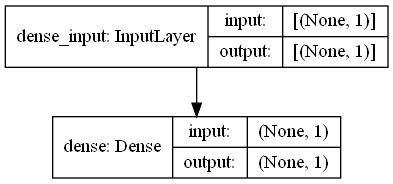

In [8]:
tf.keras.utils.plot_model(
        model,
        to_file='Files/model.png',
        show_layer_names=True,
        show_shapes=True
    )

## Train the model

This is done using `fit` function
### Input:
- features.
- lables.
- epochs: how many times it will iterrate theough featues/labels pairs.

### Output:
- loss for each epoch

In [11]:
t = time.time()
hist = model.fit(c, f, epochs=1000, verbose=0)
print (str.format("Training took: {:0.2f} Sec", time.time() - t))

Training took: 3.66 Sec


## Visualize results

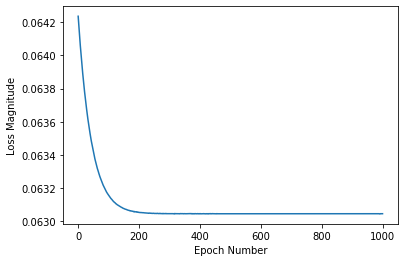

In [13]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(hist.history['loss']);

## Wait, what are weights ?

In [14]:
model.get_weights()

[array([[1.7979496]], dtype=float32), array([31.95248], dtype=float32)]

## Conversion equation
$C \times 1.8 + 32 = F$

# Saving Model

## Tensorflow format

In [15]:
model.save('models/c_to_f')

INFO:tensorflow:Assets written to: models/c_to_f\assets


## Keras format

In [16]:
model.save('models/c_to_f.h5')